In [1]:
# pip install kagglehub

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Data** **Loading**

In [3]:
file_name = "data.csv"

# Load the latest version
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/breast-cancer-wisconsin-data",
  file_name
)
# Save the dataframe to the local 'data' folder
# data.to_csv("../data/data.csv", index=True)
data.head(20)

/tmp/ipykernel_8101/3117608738.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  data = kagglehub.load_dataset(


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (569, 33)


In [5]:
display(data.describe())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
print("Column names:", data.columns.tolist()) # Use tolist() for better readability

Column names: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [8]:
print("Object type columns:", data.select_dtypes(include="object").columns.tolist()) # Use tolist() for better readability


Object type columns: ['diagnosis']


In [9]:
print("Missing values:\n", data.isna().sum())

Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

## **Data Preprocessing**

In [10]:
data = data.drop(columns='Unnamed: 32')

### Dealing with categorical data

In [11]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
# Convert 'diagnosis' to numerical using one-hot encoding.
data = pd.get_dummies(data=data, columns=['diagnosis'], drop_first=True)

In [13]:
# Rename the encoded column for clarity
data.rename(columns={'diagnosis_M': 'diagnosis'}, inplace=True)

In [14]:
# Convert boolean to int (get_dummies with drop_first=True returns boolean)
data['diagnosis'] = data['diagnosis'].astype(int)

In [15]:
print("\nData after preprocessing:")
display(data.head(4))


Data after preprocessing:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1


# **Visualizations**

###Countplot of the target variable

/tmp/ipykernel_8101/769893888.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['diagnosis'], palette='Set2')


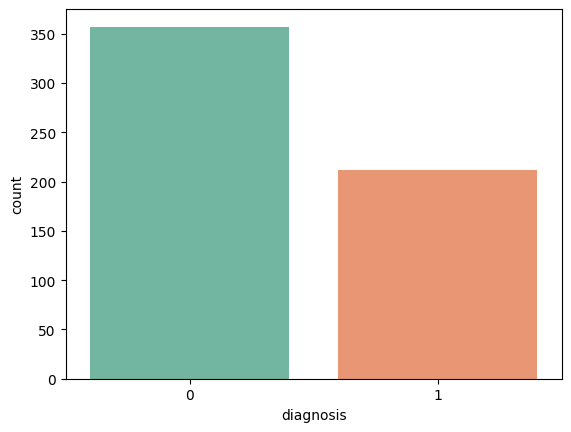

Total Malignant (1) cases: 212
Total Benign (0) cases: 357


In [16]:
sns.countplot(x=data['diagnosis'], palette='Set2')
plt.show()
print(f"Total Malignant (1) cases: {(data['diagnosis']==1).sum()}")
print(f"Total Benign (0) cases: {(data['diagnosis']==0).sum()}")

###Correlation matrix and heatmap

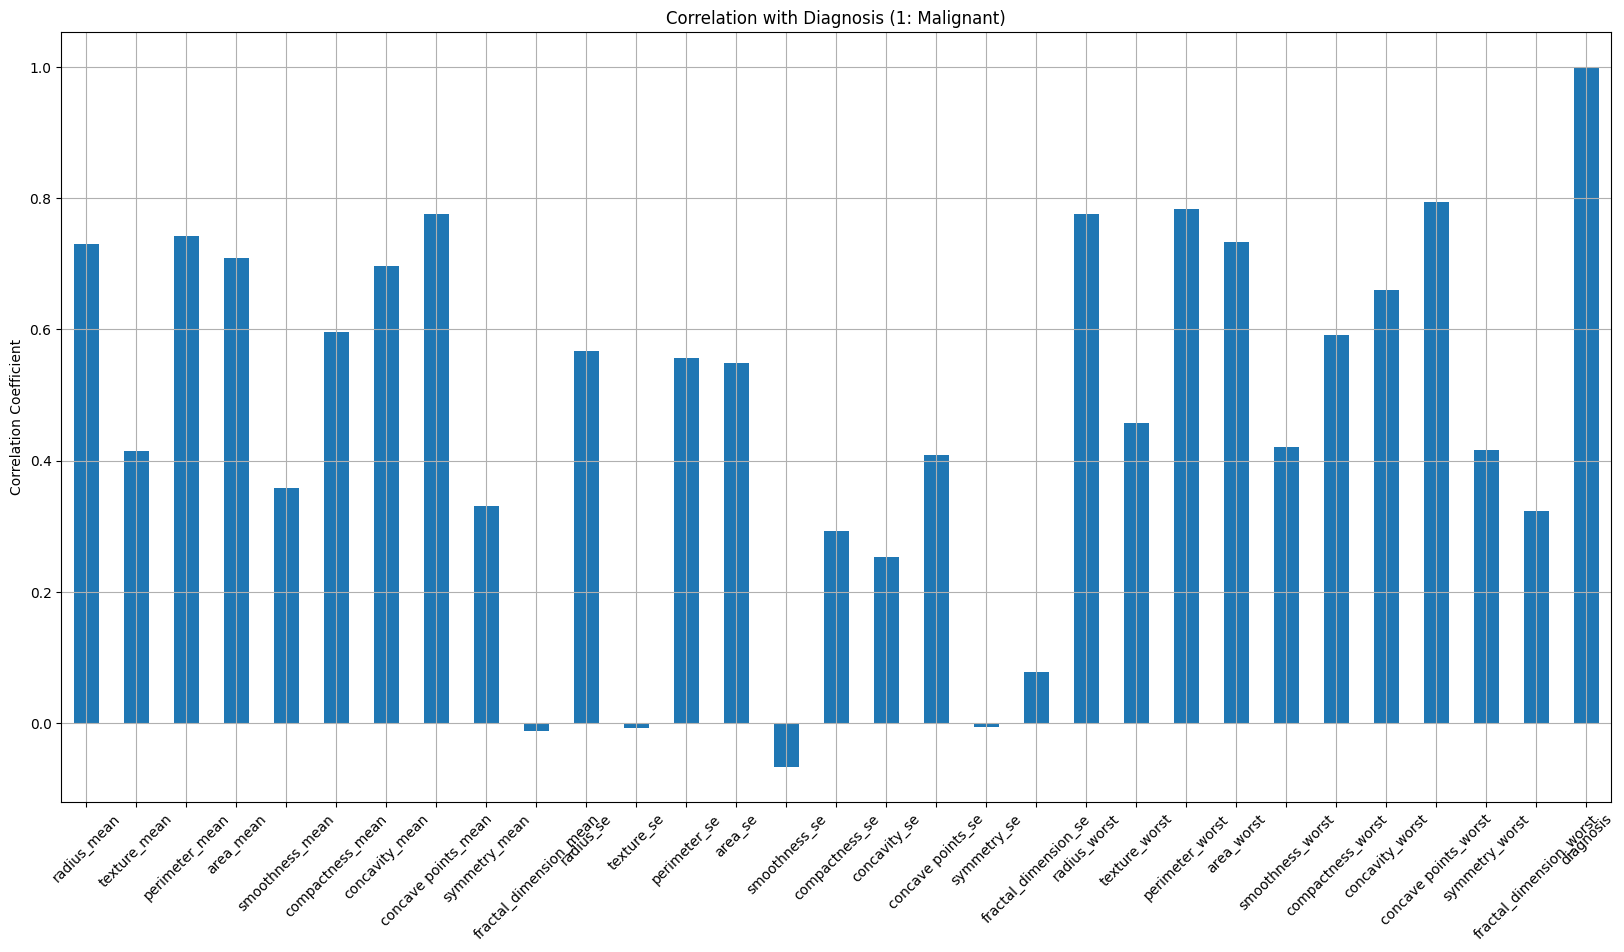

In [17]:
data_corr = data.drop(columns='id')
data_corr.corrwith(data_corr['diagnosis']).plot.bar(
    figsize=(20,10), title='Correlation with Diagnosis (1: Malignant)',
    rot=45, grid=True)
plt.ylabel('Correlation Coefficient') # Add y-axis label
plt.show()

In [18]:
#Calculate the full correlation matrix
corr = data_corr.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


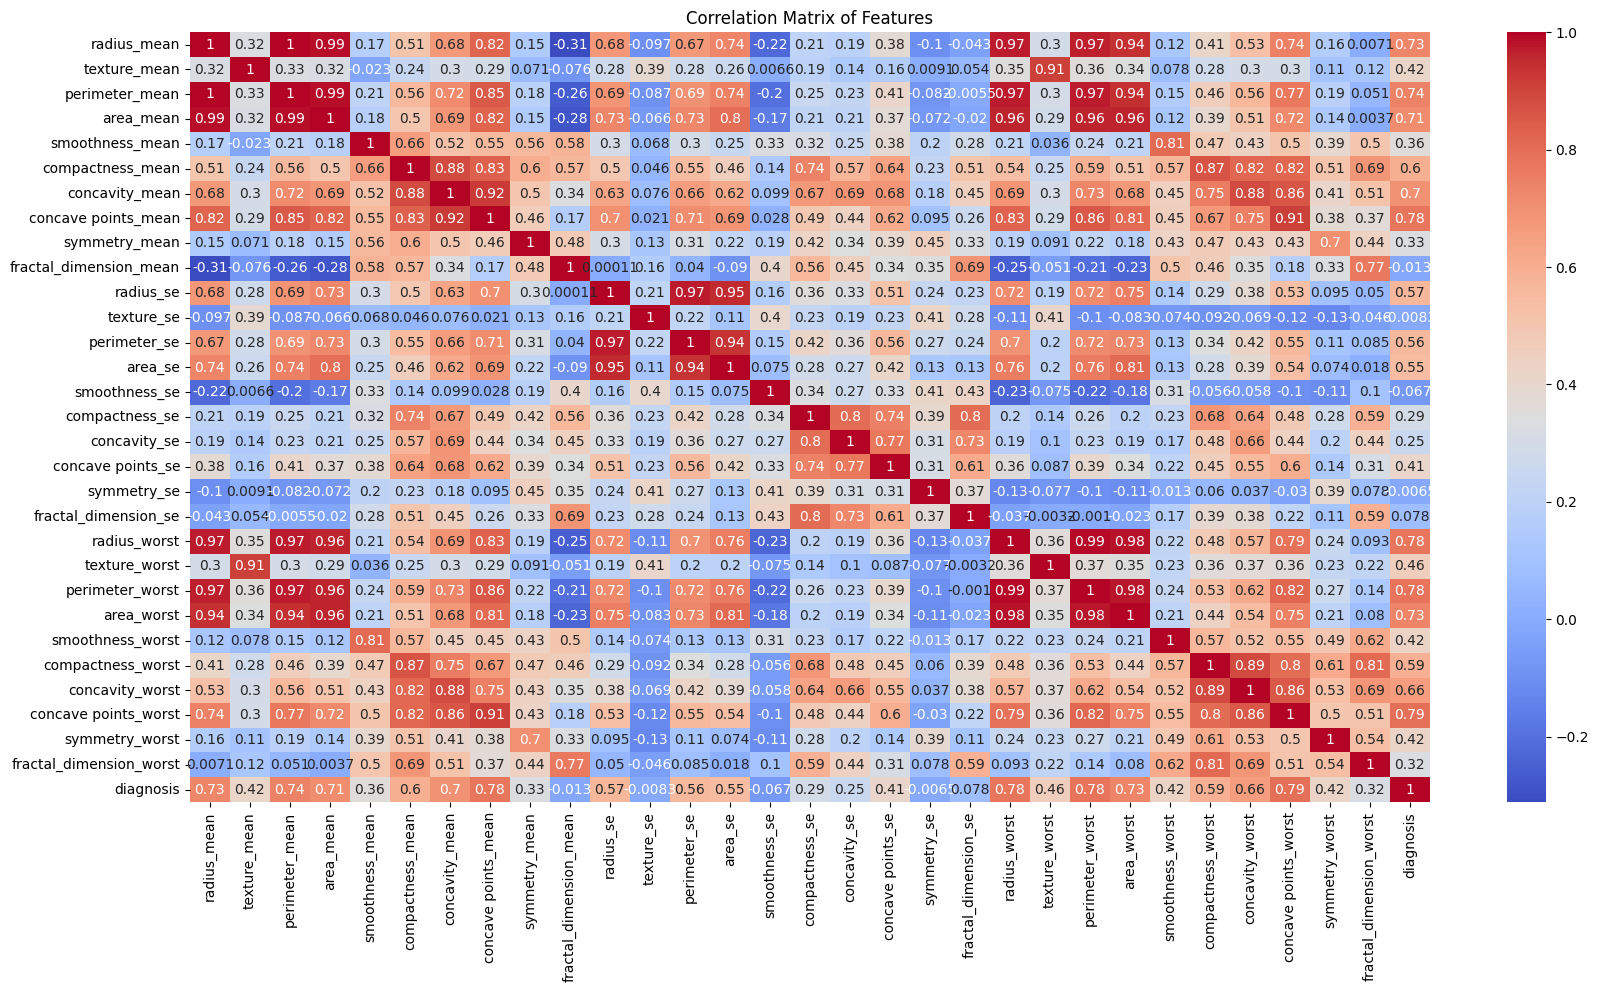

In [19]:
#Plot the correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

 ## Drop high multicollinearity

In [20]:
# Calculate the absolute correlation matrix
corr_matrix = data.drop(columns=['id', 'diagnosis']).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9 (you can adjust this threshold)
to_drop_multicollinearity = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Features to drop due to high multicollinearity:")
print(to_drop_multicollinearity)

# Drop the identified features from the DataFrame
data_dropped_multicollinearity = data.drop(columns=to_drop_multicollinearity)

print("\nShape of data after dropping highly correlated features:")
print(data_dropped_multicollinearity.shape)

Features to drop due to high multicollinearity:
['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

Shape of data after dropping highly correlated features:
(569, 22)


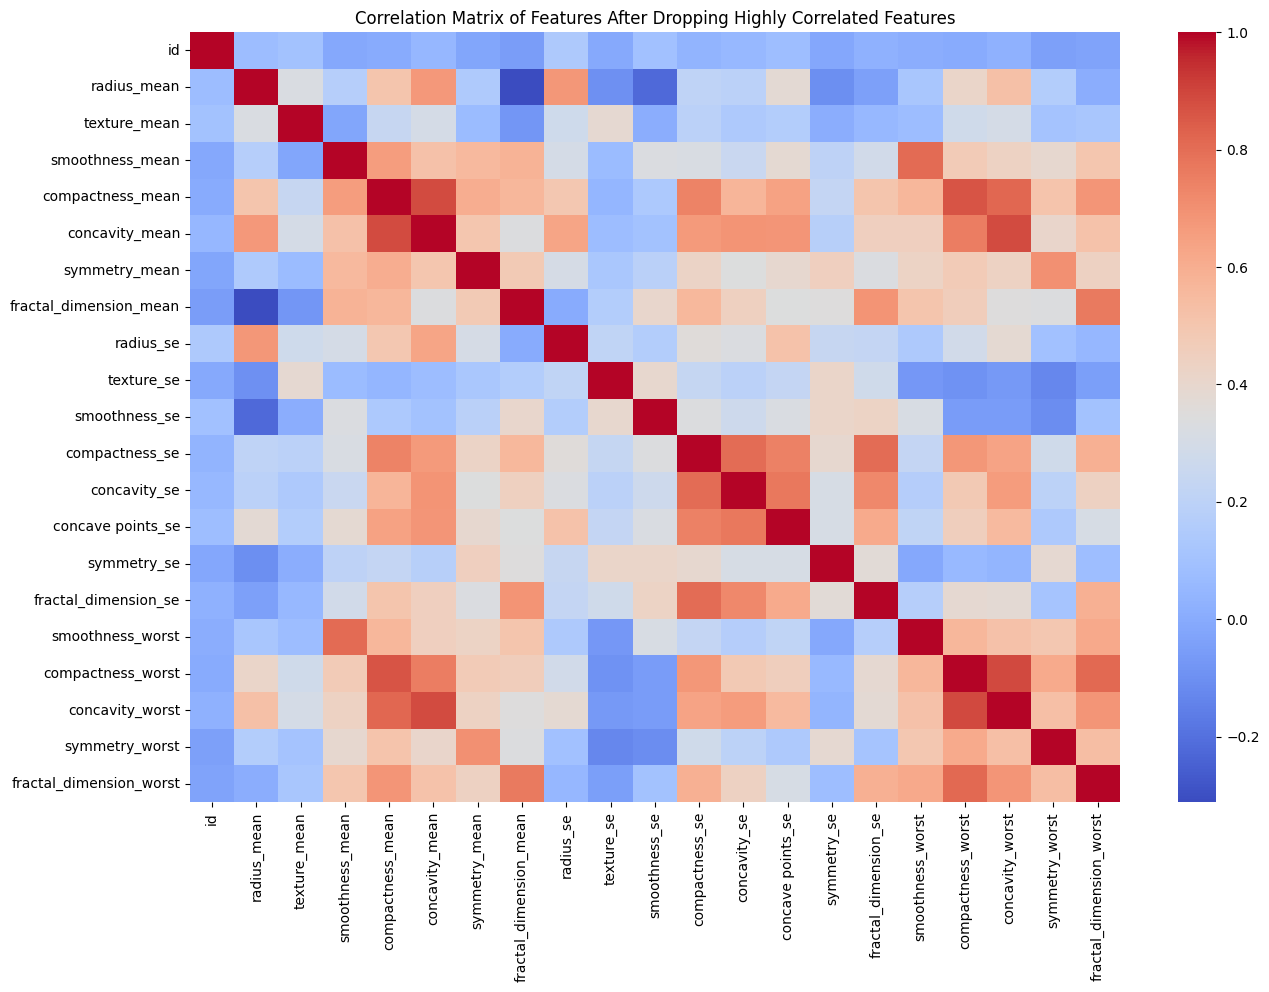

In [21]:
# Calculate the correlation matrix of the data after dropping highly correlated features
corr_matrix_dropped = data_dropped_multicollinearity.drop(columns='diagnosis').corr()

# Plot the correlation heatmap of the remaining features
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_dropped, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features After Dropping Highly Correlated Features')
plt.show()

In [22]:
data_dropped_multicollinearity.shape

(569, 22)

# **Applying ML Techniques**


In [23]:
# split data into train and test
# Define features (X) and target (y)
X = data.drop(columns=['diagnosis','id']) # Drop 'id' as it's not a feature
y = data['diagnosis']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)


Shape of training data: (455, 30)
Shape of testing data: (114, 30)


#**Feature Scaling**

In [25]:
#Initialize StandardScaler
sc = StandardScaler()

In [26]:
#Fit and transform the training data, transform the testing data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [27]:
# Display scaled test data
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head()) # Display scaled data as DataFrame with column names

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.201756,0.329079,-0.130868,-0.271455,1.029198,0.864118,0.733639,0.856697,1.120328,1.553585,...,0.031504,0.676289,0.185286,-0.062808,1.103531,0.874443,1.219091,1.389329,1.082033,1.540297
1,-0.255558,1.467633,-0.317804,-0.324002,-0.616891,-1.016540,-0.769012,-0.726495,-0.695677,-1.002451,...,-0.390180,1.426216,-0.465282,-0.423883,-0.157482,-0.951752,-0.644332,-0.833694,-0.731316,-0.877325
2,-0.026193,-0.840768,-0.091751,-0.132260,-1.215402,-0.941988,-0.857154,-0.575023,-0.805295,-0.999514,...,-0.275547,-1.022124,-0.310399,-0.328279,-1.285756,-0.981828,-1.027447,-0.494838,-1.220809,-0.921159
3,0.041767,-0.236588,-0.024635,-0.057911,-2.223804,-1.013566,-0.807228,-0.906497,-0.637214,-0.999514,...,-0.007389,-0.045742,-0.036398,-0.104976,-1.681759,-0.229905,-0.556576,-0.599974,-0.426177,-0.378290
4,-0.306528,-0.176411,-0.379156,-0.363413,-0.477601,-1.301861,-0.796034,-0.504734,-1.251074,-0.592839,...,-0.605116,-0.447782,-0.667162,-0.572410,-1.568489,-1.344779,-1.099005,-0.985727,-1.457609,-1.225189


# **Logistic Regression**

In [28]:
LC = LogisticRegression(random_state=0)
LC.fit(X_train_scaled, y_train) # Train on scaled data
y_pred_lc = LC.predict(X_test_scaled) # Predict on scaled data

# **Random forest**

In [29]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train_scaled, y_train) # Train on scaled data
y_pred_rf = RF.predict(X_test_scaled) # Predict on scaled data

# **SVM**

In [30]:
svm_model = SVC(random_state=0)
svm_model.fit(X_train_scaled, y_train) # Train on scaled data
y_pred_svm = svm_model.predict(X_test_scaled) # Predict on scaled data

# **KNN**

In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train) # Train on scaled data
y_pred_knn = knn_model.predict(X_test_scaled) # Predict on scaled data

# **Naive Bayes**

In [32]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train) # Train on scaled data
y_pred_nb = nb_model.predict(X_test_scaled) # Predict on scaled data

# **Model Evaluation**

In [33]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
predictions = [y_pred_lc, y_pred_rf, y_pred_svm, y_pred_knn, y_pred_nb]
results_list = []

for model_name, y_pred in zip(models, predictions):
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    prec = precision_score(y_true=y_test, y_pred=y_pred)
    rec = recall_score(y_true=y_test, y_pred=y_pred)
    results_list.append([model_name, acc, f1, prec, rec])

result_df = pd.DataFrame(results_list, columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])

In [34]:
# Display the performance metrics for all models
display(result_df)

,Model,Accuracy,F1 score,Precision score,Recall score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest,0.964912,0.958333,0.938776,0.978723
2,SVM,0.982456,0.978261,1.000000,0.957447
3,KNN,0.956140,0.943820,1.000000,0.893617
4,Naive Bayes,0.903509,0.884211,0.875000,0.893617


In [35]:
# Display confusion matrix for Logistic Regression as an example
print("\nConfusion Matrix for Logistic Regression:")
cm_lc = confusion_matrix(y_true=y_test, y_pred=y_pred_lc)
print(cm_lc)


Confusion Matrix for Logistic Regression:
[[65  2]
 [ 2 45]]


In [36]:
# cross validation for all models
print("\nCross Validation Results:")
for model_name, model in zip(models, [LC, RF, svm_model, knn_model, nb_model]):
    accuracies = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, cv=10) # Use scaled training data
    print(f"{model_name} - Accuracy : {accuracies.mean()*100:.2f}%")
    print(f"{model_name} - Std Deviation : {accuracies.std()*100:.2f}%")


Cross Validation Results:
Logistic Regression - Accuracy : 97.81%
Logistic Regression - Std Deviation : 1.98%


Random Forest - Accuracy : 96.05%
Random Forest - Std Deviation : 3.07%
SVM - Accuracy : 97.59%
SVM - Std Deviation : 1.53%
KNN - Accuracy : 96.49%
KNN - Std Deviation : 1.76%
Naive Bayes - Accuracy : 94.96%
Naive Bayes - Std Deviation : 2.38%


#**Hyperparameter Tuning**

In [37]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2],
    'solver': ['liblinear', 'saga']
}

In [38]:
# Initialize RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(estimator=LC, param_distributions=parameters, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=10, verbose=3, random_state=0) # Add random_state for reproducibility

In [39]:
# Fit RandomizedSearchCV on scaled training data
random_search_lr.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/10] END ..C=0.75, penalty=l2, solver=saga;, score=1.000 total time=   0.2s
[CV 2/10] END ..C=0.75, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 3/10] END ..C=0.75, penalty=l2, solver=saga;, score=0.998 total time=   0.0s
[CV 4/10] END ..C=0.75, penalty=l2, solver=saga;, score=0.998 total time=   0.0s
[CV 5/10] END ..C=0.75, penalty=l2, solver=saga;, score=0.972 total time=   0.0s
[CV 6/10] END ..C=0.75, penalty=l2, solver=saga;, score=0.991 total time=   0.0s
[CV 7/10] END ..C=0.75, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 8/10] END ..C=0.75, penalty=l2, solver=saga;, score=1.000 total time=   0.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linea

[CV 9/10] END ..C=0.75, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 10/10] END .C=0.75, penalty=l2, solver=saga;, score=1.000 total time=   0.0s
[CV 1/10] END C=1.5, penalty=l2, solver=liblinear;, score=0.992 total time=   0.0s
[CV 2/10] END C=1.5, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/10] END C=1.5, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 4/10] END C=1.5, penalty=l2, solver=liblinear;, score=0.998 total time=   0.0s
[CV 5/10] END C=1.5, penalty=l2, solver=liblinear;, score=0.970 total time=   0.0s
[CV 6/10] END C=1.5, penalty=l2, solver=liblinear;, score=0.991 total time=   0.0s
[CV 7/10] END C=1.5, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 8/10] END C=1.5, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 9/10] END C=1.5, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s[CV 10/10] END C=1.5, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s

[CV 1/1

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 8/10] END C=0.75, penalty=l2, solver=liblinear;, score=1.000 total time=   0.1s
[CV 9/10] END C=0.75, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/10] END C=0.25, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 10/10] END C=0.75, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 2/10] END C=0.25, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 5/10] END C=0.25, penalty=l2, solver=liblinear;, score=0.972 total time=   0.0s
[CV 3/10] END C=0.25, penalty=l2, solver=liblinear;, score=0.998 total time=   0.0s
[CV 6/10] END C=0.25, penalty=l2, solver=liblinear;, score=0.989 total time=   0.0s
[CV 4/10] END C=0.25, penalty=l2, solver=liblinear;, score=0.998 total time=   0.0s
[CV 7/10] END C=0.25, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s
[CV 9/10] END C=0.25, penalty=l2, solver=liblinear;, score=1.000 total time=   0.0s[CV 8/10] END C=0.25, penalty=l2, solver=liblinear;, score=1.000 total time=

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/10] END ...C=1.0, penalty=l1, solver=saga;, score=0.976 total time=   0.1s
[CV 6/10] END ...C=1.0, penalty=l1, solver=saga;, score=0.991 total time=   0.1s
[CV 7/10] END ...C=1.0, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 8/10] END ...C=1.0, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 9/10] END ...C=1.0, penalty=l1, solver=saga;, score=1.000 total time=   0.0s
[CV 10/10] END ..C=1.0, penalty=l1, solver=saga;, score=1.000 total time=   0.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linea

,estimator,LogisticRegre...andom_state=0)
,param_distributions,"{'C': [0.25, 0.5, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,10
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,0
,error_score,nan


In [40]:
print("\nBest estimator from Randomized Search (Logistic Regression):")
display(random_search_lr.best_estimator_)


Best estimator from Randomized Search (Logistic Regression):


,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [41]:
print("\nBest ROC AUC score from Randomized Search (Logistic Regression):")
print(random_search_lr.best_score_)


Best ROC AUC score from Randomized Search (Logistic Regression):
0.9965010141987829


In [42]:
print("\nBest parameters from Randomized Search (Logistic Regression):")
print(random_search_lr.best_params_)


Best parameters from Randomized Search (Logistic Regression):
{'solver': 'saga', 'penalty': 'l1', 'C': 1.0}


# **Final Model (Logistic Regression) - Train with best parameters**

In [43]:
# Initialize and train the final Logistic Regression model using the best parameters found
LRF = LogisticRegression(C=random_search_lr.best_params_['C'],
                           penalty=random_search_lr.best_params_['penalty'],
                           solver=random_search_lr.best_params_['solver'],
                           random_state=0)

LRF.fit(X_train_scaled, y_train) # Train the final model on scaled data

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [44]:
# Evaluate the final model on the test set
y_pred_lrf = LRF.predict(X_test_scaled)

acc_lrf = accuracy_score(y_true=y_test, y_pred=y_pred_lrf)
f1_lrf = f1_score(y_true=y_test, y_pred=y_pred_lrf)
prec_lrf = precision_score(y_true=y_test, y_pred=y_pred_lrf)
rec_lrf = recall_score(y_true=y_test, y_pred=y_pred_lrf)

In [45]:
# Add the final model's results to the result DataFrame
final_model_result = pd.DataFrame([["Final Model LR (Tuned)", acc_lrf, f1_lrf, prec_lrf, rec_lrf]], columns=['Model','Accuracy','F1 score', 'Precision score','Recall score'])
result_df = pd.concat([result_df, final_model_result], ignore_index=True)

In [46]:
# Display the updated result DataFrame including the tuned model
display(result_df)

,Model,Accuracy,F1 score,Precision score,Recall score
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447
1,Random Forest,0.964912,0.958333,0.938776,0.978723
2,SVM,0.982456,0.978261,1.000000,0.957447
3,KNN,0.956140,0.943820,1.000000,0.893617
4,Naive Bayes,0.903509,0.884211,0.875000,0.893617
5,Final Model LR (Tuned),0.956140,0.946237,0.956522,0.936170


# **Cross validation**

In [47]:
# Cross validation for the final tuned Logistic Regression model
print("\nCross Validation Results for Final Tuned Logistic Regression Model:")
accuracies_lrf = cross_val_score(estimator=LRF, X=X_train_scaled, y=y_train, cv=10)
print("Accuracy : ",accuracies_lrf.mean()*100,'%')
print("Std Deviation : ",accuracies_lrf.std()*100,'%')


Cross Validation Results for Final Tuned Logistic Regression Model:


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linea

Accuracy :  98.02415458937197 %
Std Deviation :  2.0838510173862965 %


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Feature Selection

In [48]:
# Select top features using f-classif on scaled training data
selector = SelectKBest(score_func=f_classif, k=10)  # You can change k to select a different number of features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [49]:
# Get the selected feature names from the original column names
selected_features = X.columns[selector.get_support()]
print("\nSelected features after applying SelectKBest on scaled data:")
print(selected_features)


Selected features after applying SelectKBest on scaled data:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


### Single Observations

In [50]:
# Demonstrating prediction on a single observation using the final tuned Logistic Regression model
single_obs = [[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]]


In [51]:
#Scale the single observation using the same scaler fitted on the training data
single_obs_scaled = sc.transform(single_obs)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
# Predict using the final tuned Logistic Regression model
predicted_diagnosis = LRF.predict(single_obs_scaled)

# **Interpret the prediction**


In [53]:
if predicted_diagnosis[0] == 1:
    print("\nPrediction for the single observation: Malignant (1)")
else:
    print("\nPrediction for the single observation: Benign (0)")


Prediction for the single observation: Malignant (1)
